<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="tu-dresden-blue.png" alt="drawing" width="200"/>
<img src="ogs-teaching.png" alt="drawing" width="200"/>

Professur für Angewandte Umweltsystemanalyse an der TU Dresden <br/>
Prof. Dr.-Ing. habil. Olaf Kolditz <br/>
***Hydroinformatik (UW-BHW-414)*** <br/>
*[Lehre-Webseite](https://www.ufz.de/index.php?de=40425)*

***Charlotte Pärsch***

***Übung HA01: Skalarprodukt***

Schreiben sie das Skalarprodukt $\nabla\cdot\mathbf{v}$ in Komponentenschreibweise.

Antwort: $\nabla\cdot\mathbf{v}$ = $\frac{\partial v_x}{\partial x} + \frac{\ partial v_y}{\partial y} + \frac{\partial v_z}{\partial z}$

***Übung HA02: Kontinuumsmechanik***

Was ist $\mathbf v \cdot \nabla \psi$ ? <br/>
Dieser Ausdruck ist ein Skalarprodukt ($\cdot$) des Geschwindigkeitsvektors ($\mathbf v = (v_x,v_y,v_z)$) 
mit dem Gradienten ($\nabla = (\partial/\partial x, \partial/\partial y, \partial/\partial z)$) einer skalaren Größe ($\psi$). <br/>
In ausgeschriebener Form (Komponentenschreibweise) bedeutet der Ausdruck: <br/>
$\mathbf v \cdot \nabla \psi  
=
v_x \partial \psi/\partial x + v_y \partial \psi/\partial y + v_z \partial \psi/\partial z$

Physikalisch ist dieser Term der advektive Fluss der Größe $\psi$.

***Übung HA03: Kontinuumsmechanik***

Was ist die physikalische Bedeutung des Terms $\Phi^\psi$?

Antwort: $\Phi^\psi$ ist der mechanische Fluss, dieser besteht aus den advektiven & diffusen Teilen.

***Übung HA04: Kontinuumsmechanik***

Schreiben Sie den Ausdruck $\nabla \cdot (\mathbf v \psi)$ in Komponentenschreibweise.

Anwort: $\nabla \cdot (\mathbf v \psi) = \frac{\partial v_x \psi}{\partial x} + \frac{\partial v_y \psi}{\partial y} + \frac{\partial v_z \psi}{\partial z}$

***Übung HA05: Kontinuumsmechanik***

Schreiben Sie den Ausdruck $\nabla \cdot (\mathbf D^\psi \nabla \psi)$ in Komponentenschreibweise.

Antwort: = $\partial_i\!\left(D^\psi_{ij}\,\partial_j\psi\right)$<br/>

=$\frac{\partial}{\partial x}(D_x \frac{\partial \psi}{\partial x})+\frac{\partial}{\partial y}(D_y \frac{\partial \psi}{\partial y})+\frac{\partial}{\partial z}(D_z \frac{\partial \psi}{\partial z})$ <br/>

=$D_x \frac{\partial^2 \psi}{\partial x^2}+D_y \frac{\partial^2 \psi}{\partial y^2}+D_z \frac{\partial^2 \psi}{\partial z^2}$

***Übung HA06: Analytik***

Prüfen Sie die Gültigkeit folgender Lösungen für die Diffusionsgleichung:
\begin{equation}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0
\end{equation}

\begin{equation}
\psi(t,x) = sin (\sqrt{\pi\alpha} x) \, e^{-\pi t}
\end{equation}
\begin{equation}
\psi(t,x) = sin (\frac{\pi}{\sqrt{\alpha}} x) \, e^{-\pi^2 t}
\end{equation}
\begin{equation}
\psi(t,x) = sin (\pi x) \, e^{-\alpha\pi^2 t}
\end{equation}

1. erste Funktion passt nicht
3. Funktion: <br/>

$\frac{\partial \psi}{\partial t} = - \alpha \pi^2\sin(\pi x) \, e^{-\alpha\pi^2 t} \,$ <br/>

$\frac{\partial \psi}{\partial x} = \cos(\pi x) \pi \, e^{-\alpha\pi^2 t}$ <br/>

$\alpha \frac{\partial \psi^2}{\partial x^2} = -\alpha \pi^2 \sin(\pi x)  \, e^{-\alpha\pi^2 t}$ <br/>
<br/>

***Übung HA07a***

Partial Differential Equation:
$\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0$

Initial condition:
$u(t=0,x)=1$

Boundary conditions
$u(t,x=0)=0$
$u(t,x=1)=0$

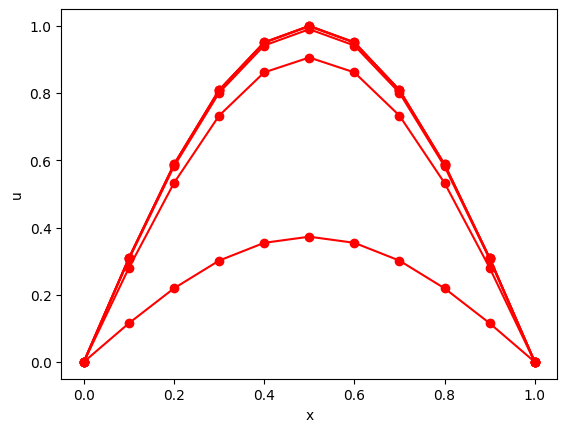

In [3]:
import math
import matplotlib.pylab as plt
PI = 3.1415926
numPoints = 10
alpha = 1e-6 #Wärme Diff, Stoff Diff :1e-10 m^2/s
t = [0.001,0.1,100,1000,10000,100000]
x = []
y = []
for n in t:
    for i in range(0,numPoints+1):
        x.append(float(i)/float(numPoints))
        #y.append(math.sin(PI*x[i]) * math.exp(-alpha*n*n))
        y.append(math.sin(PI*x[i]) * math.exp(-alpha*PI*PI*n))
    plt.plot(x,y,color='red',marker="o")
    x = []
    y = []

plt.xlabel('x')
plt.ylabel('u')
plt.axis('tight')
plt.show()

***Übung HA08: Numerische Lösung der Diffusionsgleichung mit der expliziten Finiten-Differenz-Methode***


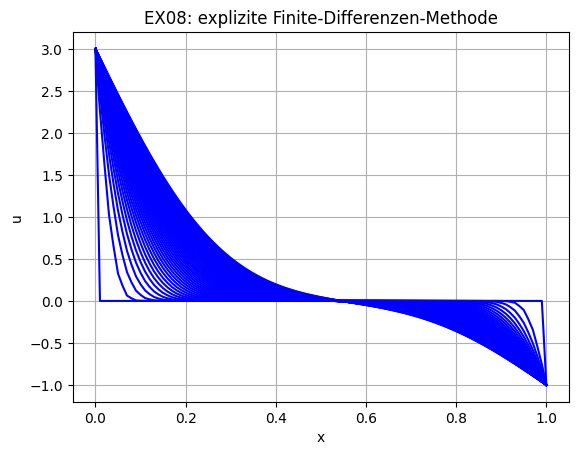

In [5]:
import math
import numpy as np
import matplotlib.pylab as plt
#data structures
##physical parameter
alpha = 1.0
##numerical parameters (discretization)
nx = 100
x = np.zeros(nx+1)
dx = 1./nx
t = [0.01]
nt = 500 #wieviele Zeitschritte bis zum stationären Zustand
dt = 0.49 * dx*dx / alpha
Ne = alpha * dt / (dx*dx)
##field function
u = np.zeros(nx+1)
uo = np.zeros(nx+1)
#initial condition
u_ic = 0.
for i in range(nx+1):
	x[i] = 0
	u[i] = 0
	uo[i] = 0
#boundary conditions
u_bc_l = 3.
u_bc_r = -1.
u[0] = uo[0] = u_bc_l
u[nx] = uo[nx] = u_bc_r
#initial state
for i in range(0,nx+1):
    x[i] = (float(i)/float(nx))
plt.plot(x,u,color='blue')
#fdm-explicit
for n in range(1,nt):
	for i in range(1,nx):
		u[i] = uo[i] + Ne *(uo[i-1] - 2*uo[i] + uo[i+1])
	if(n % 10 == 0):
	    plt.plot(x,u,color='blue')
	for i in range(1,nx):
		uo[i] = u[i]
#plots
plt.title('EX08: explizite Finite-Differenzen-Methode')
plt.xlabel('x')
plt.ylabel('u')
plt.axis('tight')
plt.grid()
plt.savefig("fdm-explicit.png")
plt.show()


***Übung: Gerinnehydraulik***


Lösung mit Newton-Verfahren

In [1]:
#os.system("a.exe")
#Starten eines ausführbaren Programms aus einem Jupyter Notebook
!g++ gerinnehydraulik.cpp
!a.exe

g++: error: gerinnehydraulik.cpp: No such file or directory
g++: fatal error: no input files
compilation terminated.
Der Befehl "a.exe" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [5]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('out.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))

plt.plot(x,y, label='Data loaded from file: out.cvs')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hydroinformatics II (Olaf Kolditz)\nExercise BHYWI-08-11-for-python\nNewton-Verfahren Gerinnehydraulik')
plt.legend()
plt.savefig("gerinne.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'out.csv'